# SB3 Algorithms

After initial (out the box) testing of each algorithm offered by Standard Baselines 3 (and contrib), this notebook offers a quick summary of all the algorithms training/performance evaluations.

### 1. Importing Relevant Modules, Algorithms and Policies

In [1]:
# Importing Required Modules
import gym
import numpy as np
import or_gym

import matplotlib.pyplot as plt

from tqdm import tqdm

# Importing PPO Algorithm and Base Policy
from stable_baselines3 import PPO
from stable_baselines3.ppo.policies import MlpPolicy
from stable_baselines3.common.evaluation import evaluate_policy


### 2. Primitive Evaluation

Here we build a function which takes a specified algorith, policy and environment. It then builds the environment, sets up the model with the associated policy. Trains the model, while evaluating it at specified intervals. Then it returns the reward and error values of the evaluation at the specified timesteps.

In [5]:
def PrimitiveEval(alg, policy, environment, episodes=50000, div=50):
    """ Trains and evaluates agent performance with precision episodes/div

    Args:
        alg (SB3 Algorithm): Imported agent algorithm
        policy (SB3 Policy): Imported policy for the agent
        environment (string): Name of generated environment to train to
        episodes (int): Number of episodes the agent trains for
        div (int): Division Factor for precision of mean_reward array
        
    Returns:
        ep_arr (arr): Array of Timesteps at which evaluation occurs
        mean_rewards (arr): Average total reward over 100 episodes
        mean_error (arr): Average total error over 100 episodes
        
    """
    
    env = or_gym.make(environment)
    
    model = alg(policy, env, verbose=0) # Model Definition
    ep_arr = np.linspace(episodes/div, episodes, div) # Episodes Array (For Plotting)
    mean_reward = np.zeros(div) # Initialising Rewards Array
    mean_error = np.zeros(div) # Initialising Error Array
    
    for i in range(div):
        model.learn(total_timesteps=episodes/div, progress_bar=False)
        mean_reward[i], mean_error[i] = evaluate_policy(model, env, n_eval_episodes=100)
    
    return ep_arr, mean_reward, mean_error

### 3. Proof of Concept

In [8]:
a, b, c = PrimitiveEval(PPO, MlpPolicy, 'InvManagement-v1', episodes=250000);

c:\Users\Nathan\anaconda3\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation 
environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and 
rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(

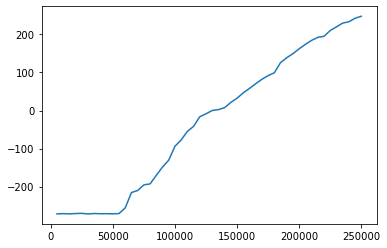

In [9]:
plt.plot(a,b);

### 4. Mass Evaluation

Now that we have the proof of concept, we can run a big for loop and get everything tested. (I have already tested everything and therefore have just kept in the algorithms and policies that actually work!) <br>

To do this, we're going to create a list of the algorithms and their respective policies, and then just iterate over the lists via their indices.

In [10]:
from stable_baselines3 import SAC
from stable_baselines3.sac.policies import MlpPolicy as SACPolicy

from stable_baselines3 import A2C
from stable_baselines3.a2c.policies import MlpPolicy as A2CPolicy

from stable_baselines3 import PPO
from stable_baselines3.ppo.policies import MlpPolicy as PPOPolicy

from sb3_contrib import ARS
from sb3_contrib.ars.policies import ARSPolicy

from sb3_contrib import RecurrentPPO
from sb3_contrib.ppo_recurrent.policies import RecurrentActorCriticPolicy

from sb3_contrib import TQC
from sb3_contrib.tqc.policies import MlpPolicy as TQCPolicy

from sb3_contrib import TRPO
from sb3_contrib.trpo.policies import MlpPolicy as TRPOPolicy

In [11]:
alg_names = [SAC, A2C, PPO, ARS, RecurrentPPO, TQC, TRPO] # Algorithms
model_names_strings = ["SAC", "A2C", "PPO", "ARS", "RecurrentPPO", "TQC", "TRPO"] # Strings of Algorithms
policies = [SACPolicy, A2CPolicy, PPOPolicy, ARSPolicy, RecurrentActorCriticPolicy, TQCPolicy, TRPOPolicy] # Policies

c:\Users\Nathan\anaconda3\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation 
environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and 
rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(

c:\Users\Nathan\anaconda3\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation 
environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and 
rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(

c:\Users\Nathan\anaconda3\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation 
environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and 
rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(

c:\Users\Nathan\anaconda3\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation 
environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and 
rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(

c:\Users\Nathan\anaconda3\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation 
environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and 
rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(

c:\Users\Nathan\anaconda3\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation 
environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and 
rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(

c:\Users\Nathan\anaconda3\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation 
environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and 
rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(

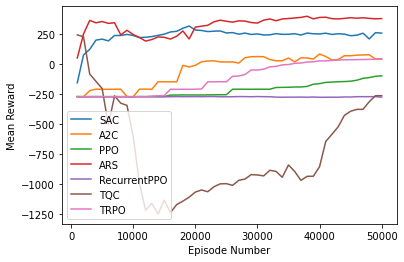

In [14]:
plt.figure()
for i in range(len(alg_names)):
    a,b,c = PrimitiveEval(alg_names[i], policies[i], 'InvManagement-v1')
    plt.plot(a,b,label=model_names_strings[i])
    
plt.xlabel('Episode Number')
plt.ylabel('Mean Reward')
plt.legend()

# Archived:

In [ ]:
# Making Supply Chain Environment
env = or_gym.make('InvManagement-v1') #gym.make('CartPole-v1')

# Constructing model
model = PPO(MlpPolicy, env, verbose=0)

In [ ]:
# Evaluating initial pre-training performance

mean_reward_before_train = evaluate_policy(model, env, n_eval_episodes=100)
print("Mean reward:", mean_reward_before_train)


In [ ]:
EpisodeNumber = np.linspace(10000,500000,50)
mean_reward = np.zeros(50)

In [ ]:
# Train the agent for 500,000 steps

for i in tqdm(range(50)):
    model.learn(total_timesteps=10000, progress_bar=True)
    mean_reward[i] = evaluate_policy(model, env, n_eval_episodes=100)[0]


In [ ]:
plt.plot(EpisodeNumber, mean_reward)

In [ ]:
# Evaluate the trained agent
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=100)

print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

# Changing the Environment's Number of Periods

In [ ]:
# Making Supply Chain Environment
env_1 = or_gym.make('InvManagement-v1') #gym.make('CartPole-v1')

# Constructing model
model_1 = PPO(MlpPolicy, env, verbose=0)

In [ ]:
env_1.periods = 60

In [ ]:
# Evaluating initial pre-training performance

mean_reward_before_train_1 = evaluate_policy(model_1, env_1, n_eval_episodes=100)
print("Mean reward:", mean_reward_before_train_1)

EpisodeNumber_1 = np.linspace(10000,200000,20)
mean_reward_1 = np.zeros(20)

# Train the agent for 200,000 steps

for i in tqdm(range(20)):
    model_1.learn(total_timesteps=10000, progress_bar=True)
    mean_reward_1[i] = evaluate_policy(model_1, env_1, n_eval_episodes=100)[0]


In [ ]:
plt.plot(EpisodeNumber_1, mean_reward_1)

# User Demand Distributions

1: poisson distribution <br>
2: binomial distribution <br>
3: uniform random integer <br>
4: geometric distribution <br>

In [ ]:
# Making Supply Chain Environment
env_poisson = or_gym.make('InvManagement-v1') 
env_poisson.dist = 1

env_binomial = or_gym.make('InvManagement-v1') 
env_binomial.dist = 2

env_uniform_rand = or_gym.make('InvManagement-v1') 
env_uniform_rand.dist = 3

env_geometric = or_gym.make('InvManagement-v1') 
env_geometric.dist = 4

# Constructing models
model_p = PPO(MlpPolicy, env, verbose=0)
model_b = PPO(MlpPolicy, env, verbose=0)
model_u = PPO(MlpPolicy, env, verbose=0)
model_g = PPO(MlpPolicy, env, verbose=0)

In [ ]:
envs = [env_poisson, env_binomial, env_uniform_rand, env_geometric]
models = [model_p, model_b, model_u, model_g]

arr = np.zeros(50)

mean_rewards = np.array([arr, arr, arr, arr])

EpisodeNumber = np.linspace(10000,500000,50)


In [ ]:
for i in range(4):

    # Evaluating initial pre-training performance

    mean_reward_before_train_n = evaluate_policy(models[i], envs[i], n_eval_episodes=100)
    print("Mean reward:", mean_reward_before_train_n)


    # Train the agent for 500,000 steps

    for j in tqdm(range(50)):
        models[i].learn(total_timesteps=10000, progress_bar=True)
        mean_rewards[i,j] = evaluate_policy(models[i], envs[i], n_eval_episodes=100)[0]


In [ ]:
for i in range(4):
    plt.figure()
    plt.title('{}'.format(i))
    plt.plot(EpisodeNumber, mean_rewards[i])